<a href="https://colab.research.google.com/github/bwowby/DS/blob/master/ir-basic/gini_impurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

### Evaluate Gini impurity

In [34]:
data = {
    '이름': ["Kang", "Kim", "Choi", "Park", "Yoon", "Lee"],
    '데일리룩': [True, False, False, False, False, False],
    '패션스타그램': [False, False, True, False, False, True],
    '우산': [False, False, False, False, False, False],
    'like': [True, False, True, True, False, True],
    'followers' : [1,21,72,80,101,210]
}

data = pd.DataFrame(data)
data = data.set_index("이름")
data = data[["패션스타그램", "데일리룩", "우산", "like", "followers"]]
data

,패션스타그램,데일리룩,우산,like,followers
이름,,,,,
Kang,False,True,False,True,1
Kim,False,False,False,False,21
Choi,True,False,False,True,72
Park,False,False,False,True,80
Yoon,False,False,False,False,101
Lee,True,False,False,True,210


In [36]:
def evaluate_gini_impurity(data) : 
    
    if len(data) == 0:
        return 0
    
    true_probability = data["like"].mean()
    print(true_probability)
    false_probability = 1 - true_probability

    gini_impurity = 1 - true_probability ** 2 - false_probability ** 2
    
    return gini_impurity

evaluate_gini_impurity(data)

0.6666666666666666


0.4444444444444444

### Evaluate Average Gini impurity
data 갯수에 맞게 비중을 반영하여 평균 구하기

In [37]:
def evaluate_average_gini_impurity(data, condition) : 
    true_data = data[condition(data)]
    false_data = data[~condition(data)]
    
    true_impurity = evaluate_gini_impurity(true_data)
    false_impurity = evaluate_gini_impurity(false_data)
    
    # 각 데이터 갯수 비중을 반영하기 위해 곱하기
    gini_impurity = true_impurity * len(true_data) + false_impurity * len(false_data)
    gini_impurity = gini_impurity / len(data)
    
    return gini_impurity

In [38]:
condition = lambda data : data["패션스타그램"] == True
evaluate_average_gini_impurity(data,condition)

1.0
0.5


0.3333333333333333

In [39]:
condition = lambda data : data["데일리룩"] == True
evaluate_average_gini_impurity(data,condition)

1.0
0.6


0.39999999999999997

In [40]:
condition = lambda data : data["우산"] == True
evaluate_average_gini_impurity(data,condition)

0.6666666666666666


0.4444444444444444

### Find Best Condition

In [41]:
def find_best_condition(data,condition_list) :
    best_gini_impurity = 0.51
    for description,condition in  condition_list.items() :
        gini_impurity = evaluate_average_gini_impurity(data,condition)
        
        if gini_impurity < best_gini_impurity : 
            best_gini_impurity = gini_impurity
            best_description = description
            best_condition = condition
    
    return best_gini_impurity, best_description, best_condition

In [42]:

condition1 = lambda data : data["패션스타그램"] == True
condition2 = lambda data : data["데일리룩"] == True
condition3 = lambda data : data["우산"] == True

condition_list = {
    "패션스타그램" : condition1,
     "데일리룩" : condition2,
     "우산" : condition3,
}

find_best_condition(data,condition_list)

1.0
0.5
1.0
0.6
0.6666666666666666


(0.3333333333333333, '패션스타그램', <function __main__.<lambda>>)

In [43]:
# classification : gini impurity | entropy 
# regression : mean squared error

!pip install graphviz
# graphviz 패키지를 읽어옵니다.
import graphviz
# graphviz 패키지에서, 트리 시각화의 가장 기본이 되는 Digraph를 가져옵니다.
from graphviz import Digraph

In [44]:
# 트리의 각 노드 하나를 시각화하는 함수를 정의합니다.
def display_node(dot, key, node):
    # node가 잎(leaf)인지 아닌지에 따라 다른 방식으로 시각화해야 합니다.
    if node["leaf"] == True:
        # node에서 확률(probability)값을 가져옵니다.
        probability = node['probability']
        
        # 확률값을 예쁘게 출력하기 위해, 소숫점을 4자리까지 자릅니다.
        probability = round(probability, 4)
        
        # 소숫점을 자른 뒤, 시각화를 위해 실수형(float)에서 문자열(string)으로 변환합니다.
        probability = str(probability)
        
        # 이를 Digraph 안에 삽입합니다.
        dot.node(key, probability)
    # 잎(leaf)이 아닐 경우는 다른 방식으로 시각화해야 합니다.
    else:
        # 구체적으로 어떤 조건으로 가르게 되었는지 설명(description)을 가져옵니다.
        description = node['description']
        
        # 이 설명을 시각화에 집어넣습니다.
        dot.node(key, description)
        
        # 트리의 노드에 좌측 노드가 있으면 이를 시각화합니다.
        if "left" in node:
            # 현재 키에 'L'마크를 뒤에 추가합니다. 이를 좌측 노드라고 가정합니다.
            left_key = key + "L"
            
            # 이 좌측 노드를 시각화합니다.
            display_node(dot, left_key, node['left'])
            
            # 좌측 노드를 시각화한 결과를 현재 노드와 연결합니다.
            dot.edge(key, left_key)

        # 비슷하게 트리의 노드에 우측 노드가 있으면 이를 시각화합니다.
        if "right" in node:
            # 현재 키에 'R'마크를 뒤에 추가합니다. 이를 우측 노드라고 가정합니다.
            right_key = key + "R"
            
            # 이 우측 노드를 시각화합니다.
            display_node(dot, right_key, node['right'])
            
            # 우측 노드를 시각화한 결과를 현재 노드와 연결합니다.
            dot.edge(key, right_key)

# 트리 전체를 시각화하는 함수를 정의합니다.
def display_tree(tree):
    # 시각화의 기본이 되는 Digraph를 정의합니다.
    dot = Digraph(comment='Decision Tree')

    # 트리의 맨 위를 노드(node)라고 가정하고 시각화합니다.
    display_node(dot, "Root", tree)

    # 이 결과를 graphviz로 출력합니다.
    return graphviz.Source(dot.source)

## Make a Tree

In [45]:

condition = lambda data : data["패션스타그램"] == True

left_data = data[condition(data)]
#왼쪽에서 like 됐을 확률
left_probability = left_data["like"].mean()

right_data = data[~condition(data)]
#오른쪽에서 like 됐을 확률
right_probability = right_data["like"].mean()

left_probability, right_probability

(1.0, 0.5)

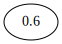

In [46]:
tree = {
    "leaf" : True,
    "probability" : 0.6
}
display_tree(tree)

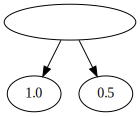

In [47]:
tree = {
    "leaf" : False,
    "condition" : condition,
    "description" : "패션스타그램",
    "left" : {
        "leaf" : True,
        "probability" : 1.0
    },
    "right" : {
        "leaf" : True,
        "probability" : 0.5
    }, 
}
display_tree(tree)

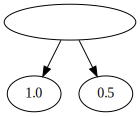

In [48]:
node = {
    "leaf" : False,
    "condition" : condition,
    "description" : "패션스타그램",
}
tree = node

node =  {
        "leaf" : True,
        "probability" : 1.0
}
tree["left"] = node  

node = {
        "leaf" : True,
        "probability" : 0.5
}
tree["right"] = node  
display_tree(tree)

1.0
0.5
1.0
0.6
0.6666666666666666
1.0
1.0
1.0
0.3333333333333333
0.5
1.0
0.3333333333333333


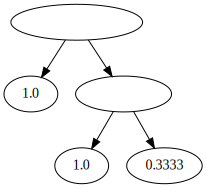

In [49]:

# 트리 함수 모듈화 3-11
def make_node(data,condition_list) :
  # leaf 아님
  if len(condition_list) !=0 : 
    
    # 지니 불순도 이용해서 더 위에 있는 노드를 정해준다 3-12
    gini_impurity, description, condition = find_best_condition(data,condition_list)
    # description = list(condition_list.keys())[0]
    # condition = condition_list[description]

    node = {'leaf' : False, 'conditon' : condition, 'description':description}
    
    left_data = data[condition(data)]
    right_data = data[~condition(data)]

    if len(left_data) >  0 and len(right_data) > 0 :
      # 조건 쓸 때마다 delete 
      del condition_list[description]

      # 재귀 호출
      node["left"] = make_node(left_data,condition_list)
      node["right"] = make_node(right_data,condition_list)  

      return node
  
  probability = data["like"].mean()
  node = {'leaf' : True, 'probability': probability}

  return node


def make_tree(data) : 
  condition1 = lambda data : data["패션스타그램"] == True
  condition2 = lambda data : data["데일리룩"] == True
  condition3 = lambda data : data["우산"] == True

  condition_list = {
    "패션스타그램" : condition1,
     "데일리룩" : condition2,
     "우산" : condition3,
  }
  tree = make_node(data,condition_list)
  return tree

tree = make_tree(data)
display_tree(tree)

In [50]:
def categorical_condition(data, feature_name, value) :
    return data[feature_name] == value

def continous_condition(data,feature_name, value) :
  return data[feature_name] < value

def make_condition(method, feature_name, value) : 
  def call_condition(data) :
    return method(data, feature_name, value)

  return call_condition

In [51]:
#패션스타그램이 True인지 아닌지로 조건 만들기
condition = make_condition(categorical_condition, "패션스타그램", True)
data[condition(data)]

,패션스타그램,데일리룩,우산,like,followers
이름,,,,,
Choi,True,False,False,True,72
Lee,True,False,False,True,210


In [52]:
# follower가 100보다 작은지 아닌지로 조건 만들기
condition = make_condition(continous_condition, "followers", 100)
data[condition(data)]

,패션스타그램,데일리룩,우산,like,followers
이름,,,,,
Kang,False,True,False,True,1
Kim,False,False,False,False,21
Choi,True,False,False,True,72
Park,False,False,False,True,80


Classification : gini impurity, entropy   
Regression : MSE